In [1]:

import os, types
import pandas as pd


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
pwd

'C:\\Users\\nallapati'

In [7]:
cd "C:\Users\nallapati\OneDrive\Desktop\cricket"

C:\Users\nallapati\OneDrive\Desktop\cricket


In [8]:
x_train=train_datagen.flow_from_directory(r"C:\Users\nallapati\OneDrive\Desktop\cricket\dataset\training",target_size=(64,64),class_mode='categorical',batch_size=6)

Found 65 images belonging to 4 classes.


In [9]:
x_test=test_datagen.flow_from_directory(r"C:\Users\nallapati\OneDrive\Desktop\cricket\dataset\testing",target_size=(64,64),class_mode='categorical',batch_size=6)

Found 51 images belonging to 4 classes.


In [10]:
len(x_test)

9

In [11]:
51/6


8.5

In [12]:
x_train.class_indices

{'flick shot': 0, 'scoop': 1, 'straight drive': 2, 'uppercut': 3}

# CNN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [14]:
model=Sequential()

In [15]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(300,activation='relu'))

In [19]:
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=9,validation_data=x_test,validation_steps=len(x_test))

C:\Users\nallapati\AppData\Local\Temp\ipykernel_11716\1639291197.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=9,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/9
11/11 [==============================] - 3s 212ms/step - loss: 2.8860 - accuracy: 0.4308 - val_loss: 1.0411 - val_accuracy: 0.6863
Epoch 2/9
11/11 [==============================] - 1s 100ms/step - loss: 1.1008 - accuracy: 0.5846 - val_loss: 0.9793 - val_accuracy: 0.7255
Epoch 3/9
11/11 [==============================] - 1s 95ms/step - loss: 1.1003 - accuracy: 0.5692 - val_loss: 0.9828 - val_accuracy: 0.7255
Epoch 4/9
11/11 [==============================] - 1s 101ms/step - loss: 0.9777 - accuracy: 0.6154 - val_loss: 0.8908 - val_accuracy: 0.6471
Epoch 5/9
11/11 [==============================] - 1s 100ms/step - loss: 0.7884 - accuracy: 0.7077 - val_loss: 0.8885 - val_accuracy: 0.6863
Epoch 6/9
11/11 [==============================] - 1s 96ms/step - loss: 0.6511 - accuracy: 0.7077 - val_loss: 0.8296 - val_accuracy: 0.7059
Epoch 7/9
11/11 [==============================] - 1s 97ms/step - loss: 0.5396 - accuracy: 0.7692 - val_loss: 0.8892 - val_accuracy: 0.6863
Epoch 8/9
11/11 

In [22]:
model.save('cricket.h5')

In [23]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('cricket.h5')

In [25]:
img=image.load_img(r"C:\Users\nallapati\OneDrive\Desktop\cricket\dataset\testing\uppercut\images (22).jpeg",target_size=(64,64))

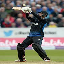

In [26]:
img

In [27]:
x=image.img_to_array(img)

In [28]:
x

array([[[ 71.,  68.,  63.],
        [ 84.,  65.,  58.],
        [116.,  83.,  74.],
        ...,
        [ 89.,  80.,  75.],
        [114.,  86.,  83.],
        [135., 115., 114.]],

       [[101., 106., 112.],
        [101.,  95.,  95.],
        [ 94.,  79.,  76.],
        ...,
        [ 53.,  55.,  54.],
        [ 75.,  60.,  65.],
        [ 83.,  72.,  76.]],

       [[ 81.,  87., 103.],
        [ 77.,  78.,  83.],
        [ 71.,  67.,  64.],
        ...,
        [ 22.,  37.,  44.],
        [ 56.,  58.,  71.],
        [ 89.,  91., 103.]],

       ...,

       [[172., 166., 108.],
        [173., 167., 109.],
        [173., 167., 109.],
        ...,
        [134., 145.,  76.],
        [137., 148.,  79.],
        [142., 153.,  84.]],

       [[173., 162., 116.],
        [183., 172., 126.],
        [176., 165., 119.],
        ...,
        [178., 167., 121.],
        [189., 178., 132.],
        [176., 165., 119.]],

       [[185., 177., 130.],
        [192., 184., 137.],
        [199., 1

In [29]:
x.ndim

3

In [30]:
x=np.expand_dims(x,axis=0)

In [31]:
x.ndim

4

In [32]:
pred=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 231ms/step


In [33]:
pred

array([1], dtype=int64)

In [34]:
index=['flick shot','scoop','straight drive','uppercut']

In [35]:
index[pred[0]]

'scoop'

In [36]:
img1=image.load_img(r"C:\Users\nallapati\OneDrive\Desktop\cricket\dataset\testing\scoop\WhatsApp Image 2022-09-18 at 8.40.15 AM.jpeg",target_size=(64,64))
y=image.img_to_array(img1)
y=np.expand_dims(y,axis=0)
pred=np.argmax(model.predict(y),axis=1)
index=['flick shot','scoop','straight drive','uppercut']
print(index[pred[0]])

1/1 [==============================] - 0s 48ms/step
scoop


In [37]:
img=image.load_img(r"C:\Users\nallapati\OneDrive\Desktop\cricket\dataset\testing\scoop\WhatsApp Image 2022-09-18 at 8.40.15 AM.jpeg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['flick shot','scoop','straight drive','uppercut']
print(index[pred[0]])

1/1 [==============================] - 0s 42ms/step
scoop


In [38]:
img=image.load_img(r"C:\Users\nallapati\OneDrive\Desktop\cricket\dataset\testing\straight drive\WhatsApp Image 2022-09-18 at 8.53.38 AM.jpeg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['flick shot','scoop','straight drive','uppercut']
print(index[pred[0]])

1/1 [==============================] - 0s 44ms/step
straight drive
